# Numerical Solution of 2D Laplace equation using FDM and Inverse Matrix Technique

- https://youtu.be/1arN0uizaXc

- PDE: $\displaystyle \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = 0$
- Domain: $x \in [0, a], y \in [0, b]$
- Boundary conditions: $\displaystyle u(x, 0) = 0, u(x, b)=\frac{\sin(\omega x)}{\sin(\omega a)}, u(0, y) = 0, u(a, y) = \frac{\sinh(\omega y)}{\sinh(\omega b)}$

**Analytical Solution**
$$
u(x, y) = \frac{\sin(\omega x)}{\sin(\omega a)}\frac{\sinh(\omega y)}{\sinh(\omega b)}
$$

Consider the following 2D Poisson equation with Dirichlet boundary condition.

$$
\begin{aligned}
u_{xx} + u_{yy} & = f(x, y) & \text{in } & \Omega \\
u|_{\partial \Omega} & = \phi & \text{on } & \partial \Omega \\
\end{aligned}
$$

$j \rightarrow x\text{-axis}$, $i \rightarrow y-\text{axis}$

$$
u(x, y) = u_{j,i}
$$

Then,

$$
\frac{u_{i, j+1} - 2u_{i,j} + u_{i, j-1}}{\Delta x^2} + \frac{u_{i+1, j} - 2u_{i,j} + u_{i-1, j}}{\Delta y^2} = f_{i,j}
$$

Set $\displaystyle \alpha=\frac{\Delta x^2}{\Delta y^2}, \Delta x^2 = \beta$.

$$
u_{i,j-1} - 2u_{i,j} + u_{i,j+1} + \alpha(u_{i-1,j}-2u_{i,j}+u_{i+1,j}) = \beta f_{i,j}
$$

We have $(nx + 2) \times (ny + 2)$ grid (2 means boundary conditions).

For $nx=2, ny=2$ case, $b=2(1+\alpha)$,

$$
\begin{pmatrix}
-b & 1 & \alpha & 0 \\
1 & -b & 0 & \alpha \\
\alpha & 0 & -b & 1 \\
0 & \alpha & 1 & -b \\
\end{pmatrix}
\begin{pmatrix}
u_{11} \\
u_{12} \\
u_{21} \\
u_{22} \\
\end{pmatrix}
=\begin{pmatrix}
\beta f_{11} - u_{10} - \alpha u_{01} \\
\beta f_{12} - u_{13} - \alpha u_{02} \\
\beta f_{21} - u_{20} - \alpha u_{31} \\
\beta f_{22} - u_{23} - \alpha u_{32} \\ 
\end{pmatrix}
$$

Then,

$$
Au = F
$$

$$
u = A^{-1} F
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Matrix A

In [ ]:
def create_A(nx, ny, alpha):
    k = nx*ny
    b = 2*(1+alpha)

    array1 = (-b) * np.ones(k) 
    array2  = np.ones(k-1)
    array3 = alpha * np.ones(k-nx)

    Adiag = np.diag(array1) 
    Aupdiag1 = np.diag(array2, k=1)
    Aupdiag2 = np.diag(array3, k=nx)

    if nx == ny:
        for i in range(nx):
            Aupdiag1[i*nx-1, i*nx] = 0

    if nx < ny:
        for i in range(ny):
            Aupdiag1[i*nx-1, i*nx] = 0

    if nx > ny:
        for i in range(ny):
            Aupdiag1[i*nx-1, i*nx] = 0

    Aup = Aupdiag1 + Aupdiag2
    Adown = Aup.T

    A1 = Aup + Adown

    A = Adiag + A1
    return A

- nx=2, ny=2

$$
\begin{pmatrix}
-b & 1 & \alpha & 0 \\
1 & -b & 0 & \alpha \\
\alpha & 0 & -b & 1 \\
0 & \alpha & 1 & -b \\
\end{pmatrix}
$$

In [ ]:
nx = 2
ny = 2
alpha = 0.5
create_A(nx, ny, alpha)

array([[-3. ,  1. ,  0.5,  0. ],
       [ 1. , -3. ,  0. ,  0.5],
       [ 0.5,  0. , -3. ,  1. ],
       [ 0. ,  0.5,  1. , -3. ]])

- nx=3, ny=2

$$
\begin{pmatrix}
-b & 1 & 0 & \alpha & 0 & 0 \\
1 & -b & 1 & 0 & \alpha & 0 \\
0 & 1 & -b & 0 & 0 & \alpha \\
\alpha & 0 & 0 & -b & 1 & 0 \\
0 & \alpha & 0 & 1 & -b & 1 \\
0 & 0 & \alpha & 0 & 1 & -b \\
\end{pmatrix}
$$

In [ ]:
nx = 3
ny = 2
alpha = 0.5
create_A(nx, ny, alpha)

array([[-3. ,  1. ,  0. ,  0.5,  0. ,  0. ],
       [ 1. , -3. ,  1. ,  0. ,  0.5,  0. ],
       [ 0. ,  1. , -3. ,  0. ,  0. ,  0.5],
       [ 0.5,  0. ,  0. , -3. ,  1. ,  0. ],
       [ 0. ,  0.5,  0. ,  1. , -3. ,  1. ],
       [ 0. ,  0. ,  0.5,  0. ,  1. , -3. ]])

- nx=2, ny=3

$$
\begin{pmatrix}
-b & 1 & \alpha & 0 & 0 & 0 \\
1 & -b & 0 & \alpha & 0 & 0 \\
\alpha & 0 & -b & 1 & \alpha & 0 \\
0 & \alpha & 1 & -b & 0 & \alpha \\
0 & 0 & \alpha & 0 & -b & 1 \\
0 & 0 & 0 & \alpha & 1 & -b \\
\end{pmatrix}
$$

In [ ]:
nx = 2
ny = 3
alpha = 0.5
create_A(nx, ny, alpha)

array([[-3. ,  1. ,  0.5,  0. ,  0. ,  0. ],
       [ 1. , -3. ,  0. ,  0.5,  0. ,  0. ],
       [ 0.5,  0. , -3. ,  1. ,  0.5,  0. ],
       [ 0. ,  0.5,  1. , -3. ,  0. ,  0.5],
       [ 0. ,  0. ,  0.5,  0. , -3. ,  1. ],
       [ 0. ,  0. ,  0. ,  0.5,  1. , -3. ]])

- nx=3, ny=3

$$
\begin{pmatrix}
-b & 1 & 0 & \alpha & 0 & 0 & 0 & 0 & 0 \\
1 & -b & 1 & 0 & \alpha & 0 & 0 & 0 & 0\\
0 & 1 & -b & 0 & 0 & \alpha & 0 & 0 & 0\\
\alpha & 0 & 0 & -b & 1 & 0 & \alpha & 0 & 0\\
0 & \alpha & 0 & 1 & -b & 1 & 0 & \alpha & 0\\
0 & 0 & \alpha & 0 & 1 & -b & 0 & 0 & \alpha\\
0 & 0 & 0 & \alpha & 0 & 0 & -b & 1 & 0\\
0 & 0 & 0 & 0 & \alpha & 0 & 1 & -b & 1 \\
0 & 0 & 0 & 0 & 0 & \alpha & 0 & 1 & -b \\
\end{pmatrix}
$$

In [ ]:
nx = 3
ny = 3
alpha = 0.5
create_A(nx, ny, alpha)

array([[-3. ,  1. ,  0. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 1. , -3. ,  1. ,  0. ,  0.5,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  1. , -3. ,  0. ,  0. ,  0.5,  0. ,  0. ,  0. ],
       [ 0.5,  0. ,  0. , -3. ,  1. ,  0. ,  0.5,  0. ,  0. ],
       [ 0. ,  0.5,  0. ,  1. , -3. ,  1. ,  0. ,  0.5,  0. ],
       [ 0. ,  0. ,  0.5,  0. ,  1. , -3. ,  0. ,  0. ,  0.5],
       [ 0. ,  0. ,  0. ,  0.5,  0. ,  0. , -3. ,  1. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0.5,  0. ,  1. , -3. ,  1. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0.5,  0. ,  1. , -3. ]])

## Matrix F

In [ ]:
def create_F(nx, ny, alpha, u):
    k = nx*ny
    F = np.zeros((k, 1))
    c = 0
    for i in range(ny):
        for j in range(nx):
            if j == 0:
                F[c] = F[c] - u[i+1, j]
            if i == 0:
                F[c] = F[c] - alpha*u[i, j+1]
            if j == nx-1:
                F[c] = F[c] - u[i+1, j+2]
            if i == ny-1:
                F[c] = F[c] - alpha*u[i+2, j+1]
            c = c + 1
    return F

- nx=2, ny=2

$u(x, 0) = 0, u(x, b) = -1, u(0, y) = 0, u(a, y) = -2$

$$
\begin{pmatrix}
- u_{10} - \alpha u_{01} \\
- u_{13} - \alpha u_{02} \\
- u_{20} - \alpha u_{31} \\
- u_{23} - \alpha u_{32} \\ 
\end{pmatrix}
=
\begin{pmatrix}
0 \\
2 \\
0.5 \\
2.5
\end{pmatrix}
$$

In [ ]:
nx = 2
ny = 2
alpha = 0.5

u = np.zeros((ny+2, nx+2))
# Boundary conditions
# Left
u[0, :] = 0
# Right
u[-1, :] = -1
# Bottom
u[:, 0] = 0
# Top
u[:, -1] = -2

create_F(nx, ny, alpha, u)

array([[0. ],
       [2. ],
       [0.5],
       [2.5]])

- nx=2, ny=3

$u(x, 0) = 0, u(x, b) = -1, u(0, y) = 0, u(a, y) = -2$

$$
\begin{pmatrix}
- u_{10} - \alpha u_{01} \\
- u_{13} - \alpha u_{02} \\
- u_{20} \\
- u_{23} \\
- u_{30} - \alpha u_{41} \\
- u_{33} - \alpha u_{42} \\ 
\end{pmatrix}
=
\begin{pmatrix}
0 \\
2 \\
0 \\
2 \\
0.5 \\
2.5
\end{pmatrix}
$$

In [ ]:
nx = 2
ny = 3
alpha = 0.5

u = np.zeros((ny+2, nx+2))
# Boundary conditions
# Left
u[0, :] = 0
# Right
u[-1, :] = -1
# Bottom
u[:, 0] = 0
# Top
u[:, -1] = -2

create_F(nx, ny, alpha, u)

array([[0. ],
       [2. ],
       [0. ],
       [2. ],
       [0.5],
       [2.5]])

- nx=3, ny=2

$u(x, 0) = 0, u(x, b) = -1, u(0, y) = 0, u(a, y) = -2$

$$
\begin{pmatrix}
- u_{10} - \alpha u_{01} \\
- \alpha u_{02} \\
- u_{14} - \alpha u_{03} \\
- u_{20} - \alpha u_{31} \\
- \alpha u_{32} \\
- u_{24} - \alpha u_{33} \\ 
\end{pmatrix}
=
\begin{pmatrix}
0 \\
0 \\
2 \\
0.5 \\
0.5 \\
2.5
\end{pmatrix}
$$

In [ ]:
nx = 3
ny = 2
alpha = 0.5

u = np.zeros((ny+2, nx+2))
# Boundary conditions
# Left
u[0, :] = 0
# Right
u[-1, :] = -1
# Bottom
u[:, 0] = 0
# Top
u[:, -1] = -2

create_F(nx, ny, alpha, u)

array([[0. ],
       [0. ],
       [2. ],
       [0.5],
       [0.5],
       [2.5]])

- nx=3, ny=3

$u(x, 0) = 0, u(x, b) = -1, u(0, y) = 0, u(a, y) = -2$

$$
\begin{pmatrix}
- u_{10} - \alpha u_{01} \\
- \alpha u_{02} \\
- u_{14} - \alpha u_{03} \\
- u_{20} \\
0 \\
- u_{24} \\
- u_{30} - \alpha u_{41} \\
- \alpha u_{42} \\
- u_{34} - \alpha u_{43} \\ 
\end{pmatrix}
=
\begin{pmatrix}
0 \\
0 \\
2 \\
0 \\
0 \\
2 \\
0.5 \\
0.5 \\
2.5
\end{pmatrix}
$$

In [ ]:
nx = 3
ny = 3
alpha = 0.5

u = np.zeros((ny+2, nx+2))
# Boundary conditions
# Left
u[0, :] = 0
# Right
u[-1, :] = -1
# Bottom
u[:, 0] = 0
# Top
u[:, -1] = -2

create_F(nx, ny, alpha, u)

array([[0. ],
       [0. ],
       [2. ],
       [0. ],
       [0. ],
       [2. ],
       [0.5],
       [0.5],
       [2.5]])

## Numerical Solution

$$
u = A^{-1} F
$$

In [ ]:
a = 3*np.pi
b = np.pi
nx = 100
ny = 50
x = np.linspace(0, a, nx+2)
y = np.linspace(0, b, ny+2)
dx = x[1] - x[0]
dy = y[1] - y[0]

alpha = (dx/dy)**2

u = np.zeros((ny+2, nx+2))
# Boundary conditions
# y=0
u[0, :] = 0
# y=b
u[-1, :] = np.sin(x)/np.sin(a)
# x=0
u[:, 0] = 0
# x=a
u[:, -1] = np.sinh(y)/np.sinh(b)

A = create_A(nx, ny, alpha)
F = create_F(nx, ny, alpha, u)
print("A = ", A.shape)
print("F = ", F.shape)
u_inner = np.linalg.solve(A, F)
print("u_inner = ", u_inner.shape)
u_inner = u_inner.reshape((ny, nx))
print("u = ", u.shape)
print("u_inner = ", u_inner.shape)
u[1:-1, 1:-1] = u_inner

A =  (5000, 5000)
F =  (5000, 1)
u_inner =  (5000, 1)
u =  (52, 102)
u_inner =  (50, 100)


In [ ]:
# Analytical solution
u_true = np.zeros((ny+2, nx+2))
for i in range(ny+2):
    for j in range(nx+2):
        u_true[i,j] = (np.sin(x[j])/np.sin(a)) * (np.sinh(y[i])/np.sinh(b))
u_true.shape

(52, 102)

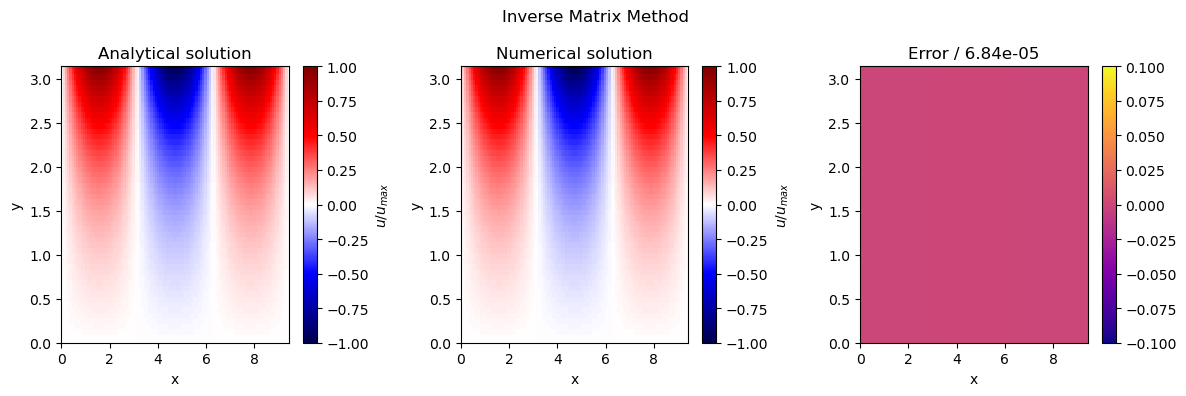

In [ ]:
fig = plt.figure(figsize=(12, 4))

ax = fig.add_subplot(131)
nu_true = u_true/np.max(u_true)
cf = ax.pcolormesh(x, y, nu_true, cmap='seismic', vmin=-1, vmax=1)
cbar = fig.colorbar(cf, ax=ax)
cbar.set_label('$u/u_{max}$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(0, a)
ax.set_ylim(0, b)
ax.set_title("Analytical solution")

ax = fig.add_subplot(132)
nu_pred = u/np.max(u)
cf = ax.pcolormesh(x, y, nu_pred, cmap='seismic', vmin=-1, vmax=1)
cbar = fig.colorbar(cf, ax=ax)
cbar.set_label('$u/u_{max}$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(0, a)
ax.set_ylim(0, b)
ax.set_title("Numerical solution")

ax = fig.add_subplot(133)
error_map = nu_true - nu_pred
cf = ax.pcolormesh(x, y, error_map, cmap='plasma', vmin=-0.1, vmax=0.1)
cbar = fig.colorbar(cf, ax=ax)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(0, a)
ax.set_ylim(0, b)
ax.set_title(f"Error / {np.abs(nu_true - nu_pred).mean():.2e}")

fig.suptitle("Inverse Matrix Method")
fig.tight_layout()
plt.show()

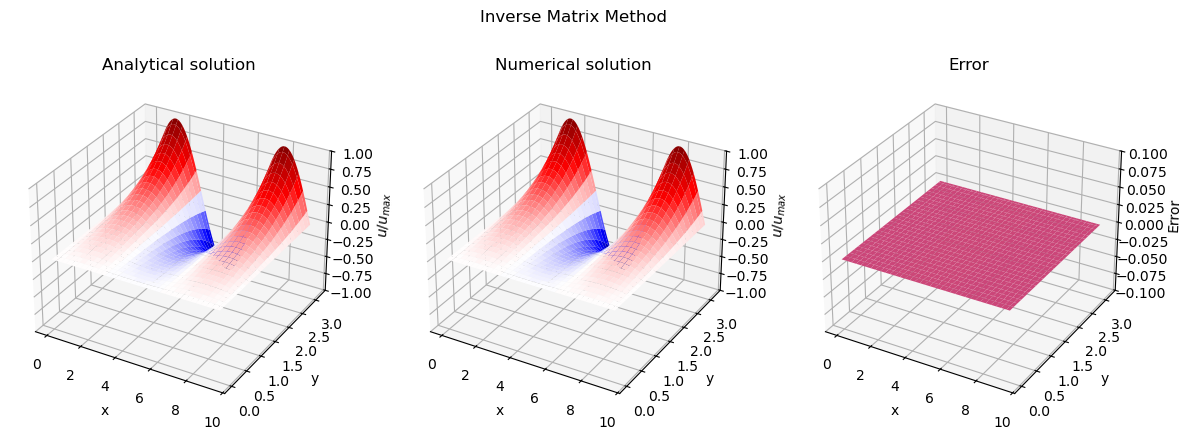

In [ ]:
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(12, 4))

ax = fig.add_subplot(131, projection='3d')
ax.plot_surface(X, Y, nu_true, cmap='seismic', vmin=-1, vmax=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$u/u_{max}$')
ax.set_zlim(-1, 1)
ax.set_title("Analytical solution")

ax = fig.add_subplot(132, projection='3d')
nu_pred = u/np.max(u)
ax.plot_surface(X, Y, nu_pred, cmap='seismic', vmin=-1, vmax=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$u/u_{max}$')
ax.set_zlim(-1, 1)
ax.set_title("Numerical solution")

ax = fig.add_subplot(133, projection='3d')
error_map = nu_true - nu_pred
ax.plot_surface(X, Y, error_map, cmap='plasma', vmin=-0.1, vmax=0.1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Error')
ax.set_zlim(-0.1, 0.1)
ax.set_title("Error")

fig.suptitle("Inverse Matrix Method", y=1.05)
fig.tight_layout()
plt.show()

In [ ]:
abs_error = np.abs(nu_true - nu_pred)
print(f"Mean absolute error: {np.mean(abs_error)}")

Mean absolute error: 6.83907134633592e-05
